In [6]:
# Bring in tensorflow 
import tensorflow as tf
# Bring in opencv
import cv2
# Bring in matplotlib
from matplotlib import pyplot as plt
# Bring in numpy
import numpy as np
import uuid
import os
import shutil

In [7]:
images_path = r'C:\Users\lrpm_\OneDrive\Escritorio\Python\ObjectDetection\data_faces\train\images'
labels_path = r'C:\Users\lrpm_\OneDrive\Escritorio\Python\ObjectDetection\data_faces\train\labels'

augment_images_path = r'C:\Users\lrpm_\OneDrive\Escritorio\Python\ObjectDetection\data_faces\train\augmentation\images' # New directory with augmented images
augment_labels_path = r'C:\Users\lrpm_\OneDrive\Escritorio\Python\ObjectDetection\data_faces\train\augmentation\labels' # New directory with the same labels since the dimensions of the image is the same

images = os.listdir(images_path)

# Create a TensorFlow session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

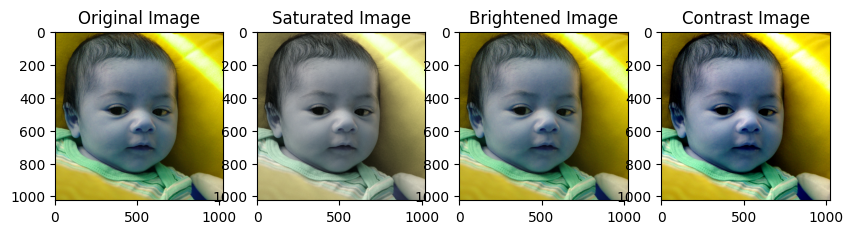

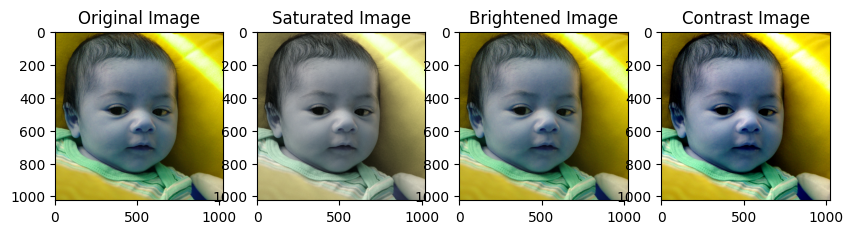

In [15]:
%matplotlib inline
for image in images:

    filename = os.path.splitext(image)[0] # Get filename without extension
    img_path = os.path.join(images_path, image) # Get the image entire path

    # Load the original image from path
    img_orig = cv2.imread(img_path, cv2.IMREAD_COLOR)

    img_saturation = tf.image.random_saturation(img_orig, lower=0.1, upper=1)
    img_brightness = tf.image.random_brightness(img_orig, max_delta=0.02)
    img_contrast = tf.image.random_contrast(img_orig, lower=0.5, upper=2)

    # create a figure with two subplots side by side
    n_rows = 1
    n_cols = 4 # Number of imges
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 5))

    # show the original image in the first subplot
    axs[0].imshow(img_orig)
    axs[0].set_title('Original Image')

    # show the saturated image in the second subplot
    axs[1].imshow(img_saturation)
    axs[1].set_title('Saturated Image')

    # show the brightened image in the second subplot
    axs[2].imshow(img_brightness)
    axs[2].set_title('Brightened Image')

    # show the brightened image in the second subplot
    axs[3].imshow(img_contrast)
    axs[3].set_title('Contrast Image')
    # display the figure
    plt.show(False)

    key = cv2.waitKey(0)
    if key == 32:
        plt.close()
        continue
    else:
        break
    # copy the file from path1 to path2
    #shutil.copy2(path1, path2)


In [ ]:
# Close the TensorFlow session
sess.close()